<a href="https://colab.research.google.com/github/jcromo-tec/TC5035.10-proyecto-integrador-equipo-37/blob/main/semana-03-avance-01/Avance1_Equipo37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

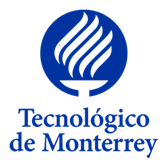

## Proyecto Integrador
## Smart Travel Assistant: Optimizando la Experiencia de Viaje con IA

### Equipo 37
##### A00759664 - Joel Orlando Hernández Ramos
##### A01793486 - Juan Carlos Alvarado Carricarte
##### A00260430 - Juan Carlos Romo Cárdenas


## **Descripción del Proyecto**

Este proyecto se propone desarrollar un asistente de inteligencia artificial integrado en una plataforma de traveltech, que facilita la elección personalizada de hoteles y destinos para los usuarios. Utilizando la función "knowledge base" de Amazon Bedrock, el sistema integrará una extensa base de datos con información detallada sobre más de 2 millones de hoteles. Para este efecto  

El objetivo principal de este proyecto es transformar la experiencia de planificación de viajes, haciendo que sea más intuitiva, personalizada y respaldada por datos. Las metas específicas incluyen mejorar la satisfacción del cliente mediante recomendaciones precisas y personalizadas, reducir el tiempo necesario para planificar un viaje y aumentar la eficiencia del proceso de selección de destinos y hoteles.

El asistente empleará modelos avanzados de sistemas de recomendación, potenciados por un modelo de lenguaje de aprendizaje profundo (LLM), para sugerir itinerarios personalizados y ofrecer asistencia general en la planificación de viajes. Las recomendaciones incluirán referencias detalladas a los hoteles disponibles en nuestra base de datos, asegurando que los usuarios reciban opciones que no solo se ajustan a sus preferencias personales, sino que también maximizan la calidad y la relevancia de la información proporcionada.

## **Cargando Conjunto de Datos**

Como se mencionó en el Avance 0, la agencia de viajes Volindo cuenta con una base de datos con millones de hoteles en formato Parquet. En este sentido, se comenzará por importar estos datos para posteriormente convertirlos en un DataFrame de pandas que permita hacer el análisis descriptivo de una manera más sencilla.

In [1]:
# Importando librerias requeridas
import pyarrow.parquet as pq
import pandas as pd
import numpy as np


In [2]:
# Cargando conjunto de datos de hoteles como un Dataset multi-parte de Apache Parquet
dataset = pq.ParquetDataset('hotel-dataset')
table = dataset.read()

In [3]:
# Creando un Dataframe de Pandas para el analisis
dataframe = table.to_pandas()


In [4]:
#Corroboramos el tamaño de nuestro DataFrame para tenerlo como referencia.
dataframe.shape

(1093095, 14)

## **Análisis Preliminar de los Datos**

Hasta el momento, solamente se conoce que se cuenta con un conjunto de datos con más de 1,093,000 entradas y 14 dimensiones o columnas. Sin embargo, para comenzar a conocer con mayor profundidad los datos, es necesario conocer qué tipo de datos y dimensiones tenemos.


In [5]:
#Primero comenzamos por explorar los primeros 10 entradas de nuestras 14 columnas.
#Esto con la intención de que conozcamos empiricamente el tipo de datos que tenemos.

dataframe.head(10)


,HotelCode,HotelName,Description,Address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,HotelRating,uuid,match_id,match_confidence_score
0,1688289,villa alun,<p>HeadLine : In Seminyak (Batubelig)</p><p>Lo...,"jalan raya batu belig gang kamboja no.2, gang ...",80361,ID,62-812-38144235,Seminyak,115.148258,-8.672673,4.0,e8558524-a7e1-4c2c-a4aa-afaa8adc2563,1005022348356,NaN
1,1863020,house of ahasna,"Located in Katunayaka, House Of Ahasna feature...","air force road, kuranakatunayake 109akatunayak...",11450,lk,None,Katunayaka,79.86482,7.18265,3.0,fe5a67fb-7140-43fc-a62c-b2521f86f257,4741643896104,NaN
2,5414820,casa vacanze margherita,Casa Vacanze Margherita is a detached holiday ...,"localita' piricone, , orosei, 08028, italy",08028,IT,None,Orosei,9.6809,40.36094,0.0,86d185f6-1e7b-4a24-8ba2-18e8b0edcf1b,927712937388,NaN
3,5758326,casa bethel,"Located in Cobán, in a building dating from 20...","9na avenida 2 07 zona 1 coban, , coban, 16001,...",16001,GT,None,Coban,-90.37927,15.46935,0.0,b93537ec-e148-42b0-9bd9-2347b765f611,5592047420856,NaN
4,1116957,pension abc,This quietly located guest house in Berlin off...,"kurfürstenstr. 20, 10785 berlinschöneberg, ber...",10785,DE,(49) 3026949903,Berlin,13.36543,52.49947,3.0,ee2eb159-87a7-4b7b-8b2a-fbcb8d92dcf6,137438955021,NaN
5,5443872,les beach chalets,<p>HeadLine : On the beach</p><p>Location : Lo...,"182 galle rd thalapatha watta, , paiyagala nor...",12000,LK,94-0765592243,Paiyagala North,79.97513,6.531615,3.0,96d71389-9395-49fa-a72b-134798b76870,3959959848243,NaN
6,1186737,wyndham orlando resort international drive,<p>HeadLine : Near Orange County Convention Ce...,"8001 international drive, orlandoflorida 32819...",32819,US,1-407-3512420,Orlando,-81.46828,28.4486,3.0,56585801-357f-4eba-9d5f-0b04872eb74f,2622,1.0
7,5850769,holiday home obala ohmucevica i,Set in Slano and only less than 1 km from Grgu...,"obala ohmucevica 4, , slano, 20232, croatia",20232,HR,None,Slano,17.88607,42.78956,3.0,800fdebe-f3b9-40cf-9355-e126ce7fc783,5660766896912,NaN
8,5411996,maeva particuliers residence le domaine de gas...,Providing a seasonal outdoor swimming pool and...,"lieu dit les hauts d'ispe, , biscarrosse, 4060...",40600,FR,None,Biscarrosse,-1.20246,44.44594,0.0,2cc379a9-091f-47a9-838f-2c4bea09bb7a,4612794877060,NaN
9,5636078,modern place,"Boasting a shared lounge, garden and views of ...","49wausan ro 3an gilmapo gu, , seoul, 04074, so...",04074,KR,None,Seoul,126.9208,37.54687,2.0,a097480d-140b-4a05-b25e-03c8e0a31c4b,5549097747769,NaN


Las columnas incluyen valores como la descripción del hotel, el número de estrellas del hotel, la dirección del hotel, el código del país donde se localiza el hotel y sus coordenadas geográficas, entre otras.

Para crear la base de conocimientos en AWS Bedrock, preliminarmente, se esperan usar los siguientes campos o columnas:
* Nombre del hotel
* Descripción del hotel
* Nombre de la ciudad donde se ubica el hotel
* Código del país donde se ubica el hotel
* Nivel del hotel (rating)

Otras piezas de información que se podrían usar incluyen:
* Longitud y Latitud

La decisión final dependerá del análisis que se realice en este entregable.



De entrada, se puede observar que la base de datos cuenta con datos numéricos (longitud y latitud), categóricos nominales (HotelCode, CountryCode, City Name, HotelName), categóricos ordinales (HotelRating) y cadenas de texto (Descripción, Dirección).

Sin embargo, es importante corroborar que estos datos estén identificados de esta manera en la base de datos.

In [6]:
# Desplegando los tipos de valor almacenados en las diferentes columnas con contador de valores no ausentes
dataframe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093095 entries, 0 to 1093094
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   HotelCode               1093095 non-null  object 
 1   HotelName               1093095 non-null  object 
 2   Description             1093095 non-null  object 
 3   Address                 1093095 non-null  object 
 4   Pincode                 1093095 non-null  object 
 5   CountryCode             1093095 non-null  object 
 6   PhoneNumber             742223 non-null   object 
 7   CityName                1093095 non-null  object 
 8   Longitude               1090879 non-null  object 
 9   Latitude                1093095 non-null  object 
 10  HotelRating             1093052 non-null  float64
 11  uuid                    1093095 non-null  object 
 12  match_id                1093095 non-null  int64  
 13  match_confidence_score  24688 non-null    float64
dtypes:

De esta manera, se identifica que tenemos 3 categorías catalogadas como numéricas y el resto son categorizadas como strings. Adicionalmente, es posible percatarse de que hay 4 columnas que tienen elementos faltantes.

Antes de continuar con el análisis, considerando la intención de este proyecto, uno de los parámetros importantes para crear una base de conocimiento para RAG es el tamaño del texto en caracteres, o ***chunk size***. Para este efecto, se agregará una nueva columna con el tamaño de la descripción del hotel en caracteres.

In [7]:
# Calculando el tamanio en caracteres de la descripcion del hotel
dataframe['DescLength'] = dataframe['Description'].str.len()


Finalmente, considerando que la base de datos contiene 11 columnas con valores identificados como strings, se podría evitar realizar un análisis estadístico descriptivo con estos datos preliminares, pues se arrojarían varios valores nulos. No obstante, se realizará con un objetivo demostrativo. Además, servirá para analizar la nueva columna agregada.

In [8]:
# Desplegando un resumen estadisticos de los datos
dataframe.describe(include='all')

,HotelCode,HotelName,Description,Address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,HotelRating,uuid,match_id,match_confidence_score,DescLength
count,1093095,1093095,1093095,1093095,1093095,1093095,742223,1093095,1090879,1093095,1.093052e+06,1093095,1.093095e+06,24688.0,1.093095e+06
unique,1093095,994885,1025518,1060951,178491,441,612681,100184,1009164,980655,NaN,1093095,NaN,NaN,NaN
top,1688289,quality inn,<br/><b>Disclaimer notification: Amenities are...,"510 gulf shore drive, , destin, 32541, usa",,US,91-93-13931393,Rome,-86.49782,,NaN,e8558524-a7e1-4c2c-a4aa-afaa8adc2563,NaN,NaN,NaN
freq,1,373,62806,94,40804,116324,6690,7937,94,2217,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.772850e+01,NaN,2.839610e+12,1.0,1.356845e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.784483e+04,NaN,1.744277e+12,0.0,5.874179e+02
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,1.0,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,1.322850e+12,1.0,9.770000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,2.843268e+12,1.0,1.383000e+03
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,4.355097e+12,1.0,1.750000e+03



La descripción extendida de los datos almacenados en el conjunto de datos indica que:

* Hay 1,093,095 registros con 14 columnas.
* Las columnas PhoneNumber y Longitude tienen valores ausentes.
* El nivel promedio de estrellas de los hoteles es por encima de 4 estrellas, de acuerdo a la media de HotelRating.
* El tamaño promedio en caracteres de la descripción de un hotel es 1,356, de acuerdo a la media de DescLength, aunque hay descripciones vacías basadas en el valor mínimo de cero (0) de la misma columna.


**CONCLUSIONES DEL ANÁLISIS PRELIMINAR**


Con base en lo observado en esta sección, se puede concluir lo siguiente:

1. Es necesario analizar a profundidad las columnas con Datos Faltantes y tratarlas de ser necesario.
2. La descripción del hotel incluye elementos, o tags, de HTML que se tienen que remover.
3. El código del país donde reside el hotel parece estar basado en el estándar ISO 3166 (ISO, s.f.) de dos letras. Este es un dato categórico con una cardinalidad de 249, ya que el estándar ISO 3166 incluye 249 códigos. Sin embargo, hay que asegurarse de que todas las entradas estén debidamente capitalizadas. Por ejemplo, se puede ver que en la segunda entrada, el CountryCode no tiene letras capitalizadas.
4. La nueva columna "DescLength" muestra un valor mínimo de 0. Esto quiere decir que hay descripciones vacías aunque no se estén identificando como tal.

## **Limpieza de los Datos**

### **Análisis de Datos Faltantes**

In [9]:
# Determinando columnas con valores ausentes
dataframe.isnull().sum()

HotelCode                       0
HotelName                       0
Description                     0
Address                         0
Pincode                         0
CountryCode                     0
PhoneNumber                350872
CityName                        0
Longitude                    2216
Latitude                        0
HotelRating                    43
uuid                            0
match_id                        0
match_confidence_score    1068407
DescLength                      0
dtype: int64

El análisis preliminar de datos faltantes muestra lo siguiente:

* La puntuación respecto a la confianza del match prácticamente es una columna vacía.
* Aproximadamente una tercera parte de los registros, más de 350 mil, no tiene números telefónicos.
* Aunque faltan más de dos mil doscientos valores de longitud, no faltan valores de latitud.
* El Rating del Hotel parece tener una cantidad mínima de datos faltantes.

**Con base en lo anterior, es importante comentar que el número de teléfono, desde el punto de vista analítico, no es esencial para la creación de un buen sistema de recomendación. Además, si se considera que tiene demasiados datos faltantes, se puede concluir que esta columna puede ser eliminada para efectos de este proyecto.**

**Similarmente, se podría concluir que la puntuación de confianza respecto al match también es descartable pues no tiene información suficiente para ser una dimensión significativa.**



En este sentido, es importante comenzar a acotar nuestras dimensiones. A continuación, se hará un análisis únicamente de datos categóricos y numéricos, que por el análisis preliminar, parecen otorgar la mejor información para la creación de un sistema de recomendación. Por lo tanto, se creará un conjunto de datos que excluya valores no requeridos.

In [10]:
# Removiendo campos con texto para analisis estadistico
dataframe_analysis = dataframe.drop(['Description','PhoneNumber','CityName','Address','Pincode','uuid','match_id','match_confidence_score'], axis=1)

In [11]:
dataframe_analysis.describe(include='all')

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength
count,1093095,1093095,1093095,1090879,1093095,1.093052e+06,1.093095e+06
unique,1093095,994885,441,1009164,980655,NaN,NaN
top,1688289,quality inn,US,-86.49782,,NaN,NaN
freq,1,373,116324,94,2217,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.772850e+01,1.356845e+03
std,NaN,NaN,NaN,NaN,NaN,4.784483e+04,5.874179e+02
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,9.770000e+02
50%,NaN,NaN,NaN,NaN,NaN,2.000000e+00,1.383000e+03
75%,NaN,NaN,NaN,NaN,NaN,3.000000e+00,1.750000e+03


In [12]:
dataframe_analysis.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093095 entries, 0 to 1093094
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HotelCode    1093095 non-null  object 
 1   HotelName    1093095 non-null  object 
 2   CountryCode  1093095 non-null  object 
 3   Longitude    1090879 non-null  object 
 4   Latitude     1093095 non-null  object 
 5   HotelRating  1093052 non-null  float64
 6   DescLength   1093095 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 58.4+ MB


In [13]:
dataframe_analysis.head()

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength
0,1688289,villa alun,ID,115.148258,-8.672673,4.0,2325
1,1863020,house of ahasna,lk,79.86482,7.18265,3.0,732
2,5414820,casa vacanze margherita,IT,9.6809,40.36094,0.0,898
3,5758326,casa bethel,GT,-90.37927,15.46935,0.0,480
4,1116957,pension abc,DE,13.36543,52.49947,3.0,1662



Como se puede observar en la descripción extendida del DataFrame acotado, así como en su información desplegada, se siguen teniendo dos columnas importantes con datos faltantes:

1. HotelRating
2. Longitude




####**LONGITUD Y LATITUD**

Como las coordenadas geográficas de longitud y latitud son candidatas para agregarse a la base de conocimiento, es pertinente revisar los valores ausentes para ver si hay forma de completarlos.

In [14]:
dataframe.loc[dataframe['Longitude'].isnull()]

,HotelCode,HotelName,Description,Address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,HotelRating,uuid,match_id,match_confidence_score,DescLength
352,1944494,sunview lodge & restaurant,<br/><b>Disclaimer notification: Amenities are...,"mombasa road, kibwezi 90137, kibwezi, 90137, k...",90137,KE,None,Kibwezi,None,,0.0,1b539168-5527-45a1-a3e5-dfcdba5c0f90,1760936592369,NaN,121
429,5001876,santubong suites b just like home damai,"<p>Featuring an outdoor swimming pool, a fitne...","jalan sultan tengah, 93050 kuching, malaysia, ...",93050,MY,None,Damai Beach,None,,4.0,d51aa7de-79f8-4ea0-831a-6607a6fdadd3,5643587027080,NaN,532
1432,5002452,hotel salyut,"<p>The hotel ""salute"" was founded in 2007. It ...","tula region, city aleksin, 18, bolotova st., ,...",,RU,None,Aleksin,None,,3.0,9c8143f7-b995-4968-a82f-77258df3ca4b,5643587027641,NaN,504
2031,5020924,atour hotel shanghai pudong lujiazui,<p> This hotel offers a pleasant stay in Shang...,"no. 138 pudong avenue lujiazui, pudong 200000 ...",,CN,None,Shanghai,None,,4.0,a129f8e4-4275-460d-9b47-bb1723a781fc,3341484557220,NaN,954
3066,5016410,premier inn bangor (northern ireland),Whether you’re planning romantic breaks or fam...,"castle avenue, bangor, northern ireland bt20 4...",,GB,None,Bangor,None,,0.0,956944a4-1d0b-4024-b903-90465cd86463,4294967296355,NaN,846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091396,5015364,iris lite corbett,Our core focus is to provide a budget friendly...,"dhikuli village,, ramnagar, ramnagar, 244715",244715,13,6398601206,Ramnagar,None,,3.0,b359cb1b-91ad-44ba-8e35-e6731d02659e,4724464026634,NaN,418
1092511,5007324,jinjiang innselect xinhua road wuhan,<p>While staying at Jinjiang Inn (Wuhan Xinhua...,"no. 162 north jianghan, roadwuhan, nanjing,",,CN,None,NANJING,None,,0.0,92d0a2c3-be2d-4284-97d3-4457138e9a37,4698694222010,NaN,318
1092668,5010802,ji hotel shanghai wujiaochang shiguang road,<p> JI Hotel Shanghai Wujiaochang Shiguang Roa...,"no.635 shiguang road, shanghai, pvg, 0000, sha...",,CN,None,Shanghai,None,,0.0,58917d5c-df4c-4292-bcad-140b71977686,2319282340207,NaN,306
1092679,5021993,bristol hotel podgorica,"<p>Situated in Podgorica, 700 metres from Chur...","2 bore stankovica,, 81000 podgorica, montenegr...",81000,ME,None,Podgorica,None,,0.0,a7d30a6e-a847-4fdc-b4a3-09c7b1cd970f,3289944949646,NaN,1076


Un hallazgo importante del despliegue anterior es que, en los registros donde el valor de longitud no está presente, la latitud tampoco presenta un valor, aun cuando el análisis de valores ausentes indica que cuenta con valores para todos los registros.

Para poder verificar este hallazgo, se convertirán los valores de longitud y latitud a un valor de punto flotante válido o faltante.

In [15]:
# Convirtiendo latitud a un numero
def to_float_number(x):
    try:
        return float(x)
    except:
        return np.nan

dataframe_analysis['Longitude'] = dataframe_analysis['Longitude'].apply(to_float_number)
dataframe_analysis['Latitude'] = dataframe_analysis['Latitude'].apply(to_float_number)

In [16]:
dataframe_analysis.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093095 entries, 0 to 1093094
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HotelCode    1093095 non-null  object 
 1   HotelName    1093095 non-null  object 
 2   CountryCode  1093095 non-null  object 
 3   Longitude    1066303 non-null  float64
 4   Latitude     1066296 non-null  float64
 5   HotelRating  1093052 non-null  float64
 6   DescLength   1093095 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 58.4+ MB


In [17]:
# Determinando columnas con valores ausentes
dataframe_analysis.isnull().sum()

HotelCode          0
HotelName          0
CountryCode        0
Longitude      26792
Latitude       26799
HotelRating       43
DescLength         0
dtype: int64

Después de la conversión se puede observar que longitud y latitud tienen una cuenta de valores ausentes similar, aunque no la misma.



#### **DESCLENGTH**

Como se mencionó anteriormente, también se notó que la columna Description no tiene valores ausentes pero hay valores con un tamaño en caracteres de cero (0). Para investigar esta situación se creará un nuevo conjunto de datos con datos de hoteles donde el tamaño de la descripción sea menos de 300 caracteres.

In [18]:
dataframe_desc = dataframe.loc[dataframe['DescLength']<300].drop(['PhoneNumber','CityName','Address','Pincode','uuid','match_id','match_confidence_score'], axis=1)


In [19]:
dataframe_desc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73360 entries, 29 to 1093088
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HotelCode    73360 non-null  object 
 1   HotelName    73360 non-null  object 
 2   Description  73360 non-null  object 
 3   CountryCode  73360 non-null  object 
 4   Longitude    72911 non-null  object 
 5   Latitude     73360 non-null  object 
 6   HotelRating  73358 non-null  float64
 7   DescLength   73360 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 5.0+ MB


In [20]:
dataframe_desc.head(40)

,HotelCode,HotelName,Description,CountryCode,Longitude,Latitude,HotelRating,DescLength
29,5574247,artinov villa,<br/><b>Disclaimer notification: Amenities are...,UA,28.401920318604,49.241844177246,0.0,121
42,5227047,cabanas wualmapu,<br/><b>Disclaimer notification: Amenities are...,CL,-71.97763,-39.27225,3.0,121
69,1100700,lewis grand hotel,<br/><b>Disclaimer notification: Amenities are...,PH,120.577199,15.165388,4.0,121
120,1397984,nour el balad,<br/><b>Disclaimer notification: Amenities are...,EG,32.60036,25.71717,2.0,121
124,5617885,rigofutty vendeghaz,<br/><b>Disclaimer notification: Amenities are...,HU,19.9869624,46.82569881,0.0,121
165,5474897,pokoje goscinne koralik,<br/><b>Disclaimer notification: Amenities are...,PL,19.962448120117,49.294097900391,0.0,121
177,5301104,apartment cesar,<br/><b>Disclaimer notification: Amenities are...,SI,13.89544567,46.28912249,0.0,121
184,5883785,casa baixú caraíva,<br/><b>Disclaimer notification: Amenities are...,BR,-39.14976952,-16.80781346,0.0,121
185,5441589,el vergel,<br/><b>Disclaimer notification: Amenities are...,AR,-57.046329498291,-37.343910217285,0.0,121
196,6186660,bella pensao,<br/><b>Disclaimer notification: Amenities are...,IN,73.7905,15.57383,0.0,121


El despliegue de datos muestra que hay muchos registros con lo que parece ser una descripción común.

Se procederá a crear un conjunto de datos con hoteles cuyas descripciones tengan menos de 121 caracteres.



In [21]:
dataframe_desc = dataframe_desc.loc[dataframe_desc['DescLength']<121]

In [22]:
dataframe_desc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 26256 to 1069856
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HotelCode    105 non-null    object 
 1   HotelName    105 non-null    object 
 2   Description  105 non-null    object 
 3   CountryCode  105 non-null    object 
 4   Longitude    105 non-null    object 
 5   Latitude     105 non-null    object 
 6   HotelRating  104 non-null    float64
 7   DescLength   105 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 7.4+ KB


In [23]:
dataframe_desc.head(40)

,HotelCode,HotelName,Description,CountryCode,Longitude,Latitude,HotelRating,DescLength
26256,4dWK,tesoro ixtapa all inclusive,<p><b>About the property</b><br /><span></span...,MX,"-101,606","1,766,317",3.0,51
36715,tJ67,americinn by wyndham wisconsin dells,This cosy hotel is set in Wisconsin Rapids Area.,US,"-8,979,388","43,622,463",3.0,48
48092,kD6w,camino real hotel & suites puebla,Rooms Number: 149,MX,"-9,825,305,939","1,901,609,993",4.0,17
51347,L0F5,capital o hotel posada terraza,,MX,"-103,833,908","2,090,864",3.0,0
53828,R4fM,homewood suites by hilton austin round rock tx,,US,"-976,758","304,899",3.0,0
62935,kk3L,ramada by wyndham viscount suites tucson east,This simple hotel is located in Downtown/Unive...,US,"-11,088,852","3,222,175",3.0,52
69356,PfXB,camelback resort,,US,"-75,355,011","41,051,849",3.0,0
82836,HotelCode,hotelname,Description,CountryCode,Longitude,Latitude,NaN,11
121147,9fqD,quality inn litchfield route 66,"Easy interstate access, riverboat gambling 50 ...",US,"-8,966,609","391,822",2.0,96
125927,XFhS,disney's all star movies resort package,,US,-81.57,28.34,3.0,0


El despliegue del conjunto de datos reducido muestra que la descripción puede considerarse inmaterial para el propósito de crear una base de conocimiento en AWS Bedrock.

También es importante notar que la entrada impresa en la tabla anterior con ID 82836 está llena de información genérica sin relevancia, pues no es realmente la información de un hotel. En este sentido, es necesario analizar si hay más casos similares.

In [24]:
dataframe_gen = dataframe.loc[dataframe['HotelCode']=='HotelCode']
dataframe_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 82836 to 82836
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HotelCode               1 non-null      object 
 1   HotelName               1 non-null      object 
 2   Description             1 non-null      object 
 3   Address                 1 non-null      object 
 4   Pincode                 1 non-null      object 
 5   CountryCode             1 non-null      object 
 6   PhoneNumber             1 non-null      object 
 7   CityName                1 non-null      object 
 8   Longitude               1 non-null      object 
 9   Latitude                1 non-null      object 
 10  HotelRating             0 non-null      float64
 11  uuid                    1 non-null      object 
 12  match_id                1 non-null      int64  
 13  match_confidence_score  0 non-null      float64
 14  DescLength              1 non-null      int

In [25]:
dataframe_gen.shape

(1, 15)

In [26]:
dataframe_gen

,HotelCode,HotelName,Description,Address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,HotelRating,uuid,match_id,match_confidence_score,DescLength
82836,HotelCode,hotelname,Description,address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,NaN,9b71b660-5404-423f-973f-5179aa943687,0,NaN,11


Todo parece indicar que era el único caso en todo el DataFrame. Es necesario eliminar esta entrada.

#### **Hotel Rating**

Ahora analizaremos los casos donde el Rating del Hotel está faltante. Es importante destacar que, a diferencia de la latitud y longitud, los datos del Hotel Rating siempre fueron identificados como numéricos. Por esto, no es necesario hacer alguna conversión.

In [27]:
dataframe.loc[dataframe['HotelRating'].isnull()]

,HotelCode,HotelName,Description,Address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,HotelRating,uuid,match_id,match_confidence_score,DescLength
26719,Nw4U,hotel indigo old town alexandria,"Set in a prime location of Alexandria (VA), Ho...",220 south union street,22314,US,,Alexandria (VA),"-77,041,405","38,802,158",NaN,b2e44441-305a-41b8-a2a9-73d5cc695f3f,12597,1.0,538
82836,HotelCode,hotelname,Description,address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,NaN,9b71b660-5404-423f-973f-5179aa943687,0,NaN,11
102693,hs6y,holiday inn express & suites nashville southea...,Stop at Holiday Inn Express & Suites Antioch t...,201 crossings place,37013,US,,Anticoch (TN),"-86,648,102","36,044,006",NaN,d5e7d832-47b8-4eed-9456-48ae50920500,20692,NaN,510
159824,eXlN,holiday inn express & suites dodge city,Holiday Inn Express & Suites Dodge City is a p...,201 4th avenue,,US,,Dodge City (KS),"-100,023,865","37,750,458",NaN,7f484a71-ae84-4ed7-8e94-00cf2d8cf0d2,21998,NaN,627
215938,MLFt,nuvo suites hotel,Nuvo Suites opens its doors and the soul of Mi...,1750 nw 107th ave,,US,1786 472,Miami,"-8,036,997","25,789,835",NaN,579374e1-e3c0-42b7-8e3f-059e8d47dba6,5049,NaN,850
231716,hfu2,hotel indigo los angeles downtown,Hotel Indigo Los Angeles Downtown is perfectly...,899 francisco street,90017,US,,Los Angeles (CA),"-118,264,252","34,047,039",NaN,b626bb30-23d7-4937-9963-e0acaee0f44f,17778,1.0,548
231911,qv1K,candlewood suites miami intl airport - 36th st,<p><b>Description</b><br><span>Near Miami Spri...,5911 nw 36th street,33166,US,,Miami (FL),"-80,357,086","25,795,848",NaN,ddc7d790-a562-4a90-bc50-40563a08cf15,15244,1.0,2736
255596,G53X,holiday inn club vacations tahoe ridge resort,The Ridge Tahoe is perfectly located for both ...,400 ridge club drive,89449,US,,Kingsbury (NV),"-119,882,843","38,961,494",NaN,cfa011ab-1293-4f17-a002-eea0e88ad1f3,17534,NaN,542
264035,lbBQ,rumfish beach resort by tradewinds,<p><b>Description</b><br><span>Near Pass-a-Gri...,6000 gulf boulevard,33706,US,,St. Pete Beach (FL),"-8,274,585","27,732,578",NaN,a133722b-f2a9-4d57-a18b-f3ad29ab15e3,6229,1.0,2636
281371,XiGy,hampton inn st albans vt,<p><b>Description</b><br><span>In St. Albans (...,43 lake street,5478,US,,Saint Albans (VT),"-73,084,648","44,811,043",NaN,00983998-3e2c-4d19-8855-20c68aae9d10,24915,NaN,2245


Estos registros parecen estar íntegros excepto por la falta de rating. No obstante, esta dimensión es una de las más importantes para un sistema de recomendación de hoteles. El imputar los datos faltantes sería mentirle a los clientes sobre la calificación de estos hoteles.

### **Solución a los Datos Faltantes**





**JUSTIFICACIÓN**

**En este sentido, lo que se optará por hacer con estos datos es eliminarlos. Cuando se construye un sistema de recomendación para una agencia de viajes, es esencial asegurar que los datos que lo alimentan sean completos y precisos para mejorar la calidad y la relevancia de las recomendaciones ofrecidas a los clientes. Los registros de hoteles que carecen de información esencial como el rating, la descripción o los datos geográficos pueden comprometer significativamente la efectividad de las recomendaciones. La ausencia de un rating o una descripción adecuada puede resultar en recomendaciones que no reflejan con precisión las expectativas y necesidades de los viajeros, llevando posiblemente a experiencias negativas. Además, la falta de información geográfica impide la realización de recomendaciones basadas en ubicación, un factor crucial para muchos viajeros.**

**Eliminar estos registros incompletos mejora no solo la integridad y la consistencia de la base de datos, sino también la eficiencia del procesamiento y el mantenimiento de los datos. Esto se traduce en un sistema más ágil y menos propenso a errores, lo que a su vez puede aumentar la confianza de los usuarios en las recomendaciones proporcionadas. En última instancia, una base de datos limpia y bien curada facilita análisis más profundos y visualizaciones más impactantes, mejorando la experiencia del usuario y fortaleciendo la percepción de la marca de la agencia de viajes.**

Considerando que, básicamente, se busca considerar cualquier registro que tenga alguna dimensión importante incompleta, se procederá a usar una versión acotada del DataFrame original. A este DataFrame se le borrarán todos los registros que no tengan todas las dimensiones completas.

In [28]:
#Trabajaremos con el DataFrame donde convertimos a númericos los datos de Lat y Long´
#Le agregaremos la columna de Descripción y CitiNamepues esta será importante para la creación del sistema

dataframe_analysis['Description']=dataframe['Description']
dataframe_analysis['CityName']=dataframe['CityName']
dataframe_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093095 entries, 0 to 1093094
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HotelCode    1093095 non-null  object 
 1   HotelName    1093095 non-null  object 
 2   CountryCode  1093095 non-null  object 
 3   Longitude    1066303 non-null  float64
 4   Latitude     1066296 non-null  float64
 5   HotelRating  1093052 non-null  float64
 6   DescLength   1093095 non-null  int64  
 7   Description  1093095 non-null  object 
 8   CityName     1093095 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 75.1+ MB


In [29]:
dataframe_analysis= dataframe_analysis.dropna()
dataframe_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066260 entries, 0 to 1093094
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HotelCode    1066260 non-null  object 
 1   HotelName    1066260 non-null  object 
 2   CountryCode  1066260 non-null  object 
 3   Longitude    1066260 non-null  float64
 4   Latitude     1066260 non-null  float64
 5   HotelRating  1066260 non-null  float64
 6   DescLength   1066260 non-null  int64  
 7   Description  1066260 non-null  object 
 8   CityName     1066260 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 81.3+ MB


Se puede observar que en este punto se eliminaron un total de 26,835 registros.

Esto representa un **2.4%** del DataFrame original.

Realmente es un porcentaje pequeño el que fue descartado. No obstante, todavía falta descartar aquellas entradas donde la descripción es nula. Como se demostró anteriormente, esto no está siendo captado por la función .info de pandas.

In [30]:
#Buscamos de nuevo aquellas entradas que no tienen descripción.
dataframe_analysis.loc[dataframe_analysis['DescLength']<121]


,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
125927,XFhS,disney's all star movies resort package,US,-81.57,28.34,3.0,0,,Walt Disney World
213561,Wymh,grand legacy at the park (formerly ramada main...,US,-117.91,33.81,3.0,0,,Los Angeles
883942,hsaM,embassy suites cincinnati northeast /blue ash,US,-84.38,39.26,3.0,0,,Cincinnati


In [31]:
dataframe_analysis=dataframe_analysis[dataframe_analysis['DescLength']>=121]
dataframe_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066257 entries, 0 to 1093094
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HotelCode    1066257 non-null  object 
 1   HotelName    1066257 non-null  object 
 2   CountryCode  1066257 non-null  object 
 3   Longitude    1066257 non-null  float64
 4   Latitude     1066257 non-null  float64
 5   HotelRating  1066257 non-null  float64
 6   DescLength   1066257 non-null  int64  
 7   Description  1066257 non-null  object 
 8   CityName     1066257 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 81.3+ MB


Se puede observar que solamente se eliminaron 3 registros que corresponden a aquellos que no tenían descripción.

### **Corrección formato COUNTRYCODE**



Como se mencionó en el análisis preliminar de los datos, la dimensión categórica de Country Code parecía necesitar una corrección de formato. Según la norma ISO correspondiente, el código de los países de dos letras debe ir en mayúsculas. En este sentido, se asegurará que todas las entradas estén en este formato.

In [32]:
# Convirtiendo CountryCode a mayusculas
def to_capital_letters(x):
    try:
        return str(x).upper()
    except:
        return np.nan

dataframe_analysis['CountryCode'] = dataframe_analysis['CountryCode'].apply(to_capital_letters)
dataframe_analysis.head()

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
0,1688289,villa alun,ID,115.148258,-8.672673,4.0,2325,<p>HeadLine : In Seminyak (Batubelig)</p><p>Lo...,Seminyak
1,1863020,house of ahasna,LK,79.864820,7.182650,3.0,732,"Located in Katunayaka, House Of Ahasna feature...",Katunayaka
2,5414820,casa vacanze margherita,IT,9.680900,40.360940,0.0,898,Casa Vacanze Margherita is a detached holiday ...,Orosei
3,5758326,casa bethel,GT,-90.379270,15.469350,0.0,480,"Located in Cobán, in a building dating from 20...",Coban
4,1116957,pension abc,DE,13.365430,52.499470,3.0,1662,This quietly located guest house in Berlin off...,Berlin


En comparación con el DataFrame anterior, la segunda entrada ya cuenta con el Country Code en mayúsculas. Ahora corroboraremos que haya solamente dos letras en cada entrada. No puede haber menos o más.

In [33]:
#Se crea una lista que contenga la longitud del string de todos los registros de ConutryCode
Code_length=dataframe_analysis['CountryCode'].str.len()

min(Code_length)

0

Parece haber espacios vacíos también para esta dimensión.

In [34]:
max(Code_length)

2

Al menos la longitud máxima del string parece respetarse.

In [35]:
#Para poder identificar con mayor facilidad los regisrtos incompletos, se agrega la columna de CodeLength
dataframe_analysis['Codelength']=dataframe_analysis['CountryCode'].str.len()
dataframe_analysis.loc[dataframe_analysis['Codelength']==0]

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName,Codelength
28426,5005278,zone connect goa,,73.785120,15.565370,4.0,121,<br/><b>Disclaimer notification: Amenities are...,Anjuna,0
903509,5007841,frankfort hotel & spa,,69.328835,41.345065,3.0,121,<br/><b>Disclaimer notification: Amenities are...,Tashkent,0
907683,5017661,reyado hotel kudan,,139.744092,35.693256,0.0,446,Property Description\nOpened: 2019Number of Ro...,Tokyo,0
931385,5021855,ramada wyndham huangshi huangshigang,,115.042888,30.245982,0.0,655,<p>The best of the area is within easy reach w...,Huangshi,0


Estos son los 4 registros que no tienen el Country Code. Dado que son pocos registros y que tenemos el nombre de la ciudad en la que se encuentran, el Country Code será agregado manualmente. No obstante, antes se verificará que no haya entradas con solo una letra.

In [36]:
dataframe_analysis.loc[dataframe_analysis['Codelength']==1]

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName,Codelength


Todo parece indicar que solamente hay registros nulos. Los registros incompletos no parecen ser un problema en esta ocasión.

In [37]:
dataframe_analysis['CountryCode'][28426]= 'IN'
dataframe_analysis['CountryCode'][903509]= 'UZ'
dataframe_analysis['CountryCode'][907683]= 'JP'
dataframe_analysis['CountryCode'][931385]= 'CN'

<ipython-input-37-5681d47f29b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_analysis['CountryCode'][28426]= 'IN'
<ipython-input-37-5681d47f29b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_analysis['CountryCode'][903509]= 'UZ'
<ipython-input-37-5681d47f29b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_analysis['CountryCode'][907683]= 'JP'
<ipython-input-37-5681d47f29b6>:4: SettingWithCopyWar

In [38]:
#Recontamos la longitud del string de Country Code para verificar que ahora no nos salgan espacios vacios
dataframe_analysis['Codelength']=dataframe_analysis['CountryCode'].str.len()
dataframe_analysis.loc[dataframe_analysis['Codelength']==0]

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName,Codelength


Los espacios vacíos fueron llenados satisfactoriamente.

Antes de seguir, se eliminará la columna CodeLength que solamente se utilizó para identificar los outliers.

In [39]:
dataframe_analysis= dataframe_analysis.drop(['Codelength'], axis=1)

### **Corrección formato DESCRIPTION**


Como se comentó en un principio, las cadenas de caracteres en la descripción traen formato de HTML. Para evitar problemas en el futuro, estos serán removidos.

A continuación, se imprime el DataFrame actual donde se observa en las primeras entradas que hay texto en formato HTML.


In [40]:
dataframe_analysis.head(20)

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
0,1688289,villa alun,ID,115.148258,-8.672673,4.0,2325,<p>HeadLine : In Seminyak (Batubelig)</p><p>Lo...,Seminyak
1,1863020,house of ahasna,LK,79.864820,7.182650,3.0,732,"Located in Katunayaka, House Of Ahasna feature...",Katunayaka
2,5414820,casa vacanze margherita,IT,9.680900,40.360940,0.0,898,Casa Vacanze Margherita is a detached holiday ...,Orosei
3,5758326,casa bethel,GT,-90.379270,15.469350,0.0,480,"Located in Cobán, in a building dating from 20...",Coban
4,1116957,pension abc,DE,13.365430,52.499470,3.0,1662,This quietly located guest house in Berlin off...,Berlin
5,5443872,les beach chalets,LK,79.975130,6.531615,3.0,1738,<p>HeadLine : On the beach</p><p>Location : Lo...,Paiyagala North
6,1186737,wyndham orlando resort international drive,US,-81.468280,28.448600,3.0,2325,<p>HeadLine : Near Orange County Convention Ce...,Orlando
7,5850769,holiday home obala ohmucevica i,HR,17.886070,42.789560,3.0,870,Set in Slano and only less than 1 km from Grgu...,Slano
8,5411996,maeva particuliers residence le domaine de gas...,FR,-1.202460,44.445940,0.0,1781,Providing a seasonal outdoor swimming pool and...,Biscarrosse
9,5636078,modern place,KR,126.920800,37.546870,2.0,1732,"Boasting a shared lounge, garden and views of ...",Seoul


Se ve que en la primera entrada y varias otras posteriormente tienen dicho formato. Por ende, se procederá a corregirlo.

In [41]:
import re

In [42]:
def remove_html_tags(text):
    html_pattern = re.compile('<.*?>')
    clean_text = re.sub(html_pattern, '', text)
    return clean_text

In [43]:
dataframe_analysis['Description'] = dataframe_analysis['Description'].apply(remove_html_tags)
dataframe_analysis.head(20)

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
0,1688289,villa alun,ID,115.148258,-8.672673,4.0,2325,HeadLine : In Seminyak (Batubelig)Location : W...,Seminyak
1,1863020,house of ahasna,LK,79.864820,7.182650,3.0,732,"Located in Katunayaka, House Of Ahasna feature...",Katunayaka
2,5414820,casa vacanze margherita,IT,9.680900,40.360940,0.0,898,Casa Vacanze Margherita is a detached holiday ...,Orosei
3,5758326,casa bethel,GT,-90.379270,15.469350,0.0,480,"Located in Cobán, in a building dating from 20...",Coban
4,1116957,pension abc,DE,13.365430,52.499470,3.0,1662,This quietly located guest house in Berlin off...,Berlin
5,5443872,les beach chalets,LK,79.975130,6.531615,3.0,1738,HeadLine : On the beachLocation : Located in P...,Paiyagala North
6,1186737,wyndham orlando resort international drive,US,-81.468280,28.448600,3.0,2325,HeadLine : Near Orange County Convention Cente...,Orlando
7,5850769,holiday home obala ohmucevica i,HR,17.886070,42.789560,3.0,870,Set in Slano and only less than 1 km from Grgu...,Slano
8,5411996,maeva particuliers residence le domaine de gas...,FR,-1.202460,44.445940,0.0,1781,Providing a seasonal outdoor swimming pool and...,Biscarrosse
9,5636078,modern place,KR,126.920800,37.546870,2.0,1732,"Boasting a shared lounge, garden and views of ...",Seoul


Como se puede observar, los tags de HTML han sido eliminados de la primera entrada y de las posteriores. En este sentido, se puede concluir que la funcion remove_htlm_tags efectivamente soluciono el problema en todo el DataFrame.

## **Análisis Unidimensional de la Distribución de los Datos**

Para completar el análisis de la distribución de los datos se usarán únicamente variables categóricas y numéricas.

In [44]:
# Creando un conjunto de datos para analisis de la distribucion de los datos
dataframe_analysis_dist = dataframe_analysis.drop(['HotelCode','HotelName','Longitude','Latitude', 'CityName', 'Description'], axis=1)


array([[<Axes: title={'center': 'HotelRating'}>,
        <Axes: title={'center': 'DescLength'}>]], dtype=object)

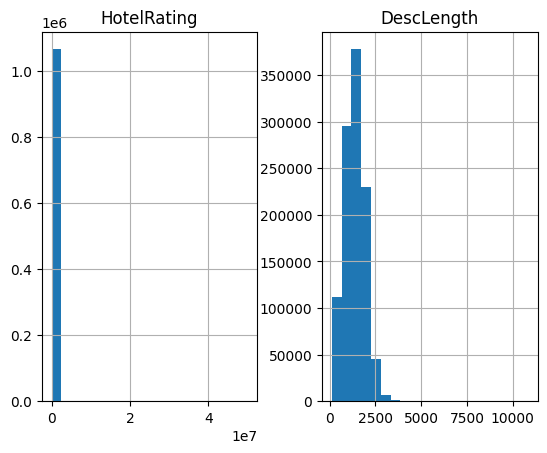

In [45]:
dataframe_analysis_dist.hist(bins=20)


El análisis de la distribución de los valores de las columnas HotelRating y DescLength muestra lo siguiente:

* La mayoría de las descripciones tienen menos de 5,000 caracteres.
* El nivel de estrellas del hotel tiene valores incorrectos, mayores de 5.

El primer ajuste a realizar es limitar el conjunto de datos con un nivel de estrellas de 5 o menos.

In [46]:
dataframe_analysis_dist = dataframe_analysis_dist.loc[dataframe_analysis_dist['HotelRating']<=5]

In [47]:
dataframe_analysis_dist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066256 entries, 0 to 1093094
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   CountryCode  1066256 non-null  object 
 1   HotelRating  1066256 non-null  float64
 2   DescLength   1066256 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.5+ MB


array([[<Axes: title={'center': 'HotelRating'}>,
        <Axes: title={'center': 'DescLength'}>]], dtype=object)

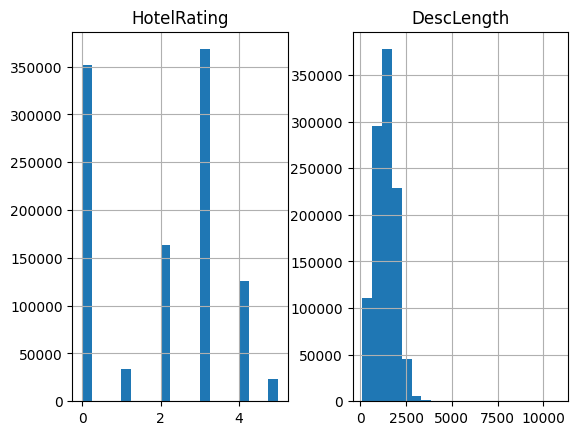

In [48]:
dataframe_analysis_dist.hist(bins=20)

Después del ajuste, se puede observar que el nivel de las estrellas se niveló con una pérdida mínima de 44 registros. Sin embargo, más de la tercera parte de los registros, o más de 350 mil registros, tienen entre 0 y 1 estrella.

El siguiente ajuste a realizar es ver el cambio en la distribución si se remueven descripciones con más de 4 mil caracteres.

In [49]:
dataframe_analysis_dist = dataframe_analysis_dist.loc[dataframe_analysis_dist['DescLength']<=4000]

In [50]:
dataframe_analysis_dist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066019 entries, 0 to 1093094
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   CountryCode  1066019 non-null  object 
 1   HotelRating  1066019 non-null  float64
 2   DescLength   1066019 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.5+ MB


array([[<Axes: title={'center': 'HotelRating'}>,
        <Axes: title={'center': 'DescLength'}>]], dtype=object)

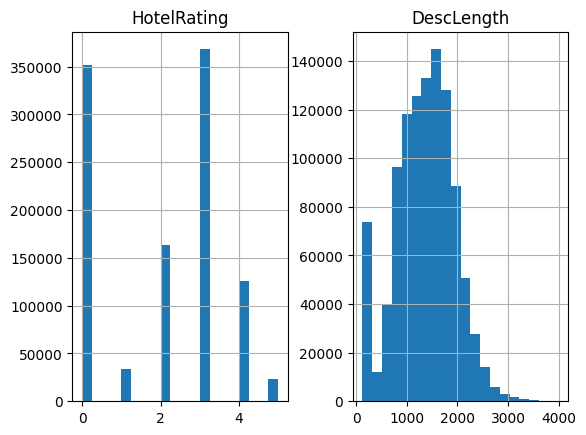

In [51]:
dataframe_analysis_dist.hist(bins=20)


Al remover registros con descripciones con más de 4 mil caracteres, se perdieron otros 247 registros, pero se puede ver que la mayoría de las descripciones tienen entre 500 y 2500 caracteres.

Para analizar la distribución de los datos en relación a los países se va a crear una tabla pivote.

In [52]:
pivot_table = pd.pivot_table(data=dataframe_analysis_dist,index=['CountryCode'],values=['HotelRating'],aggfunc='count')

In [53]:
pivot_table.head(300)

,HotelRating
CountryCode,
11,2
12,1
13,2
85,1
AD,561
...,...
YE,4
YT,4
ZA,13081


El análisis preliminar revela que, aparte de los valores vacíos y el formato corregidos, esta columna tiene otro error de outliers que no corresponden a los valores categóricos que debería tener. En este sentido, se procederá a corregir los 6 registros que tienen un valor numérico en lugar del código de dos letras correspondiente.

In [54]:
#lOCALIZAMOS QUE ENTRADAS SON
dataframe_analysis.loc[dataframe_analysis['CountryCode']=='11']

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
226508,5022122,hypernym hotel & suites,11,12.565302,55.676868,3.0,1651,HeadLine : Near Tivoli GardensLocation : With ...,Denmark
564401,5012156,tier collection,11,23.722661,37.986424,3.0,1630,HeadLine : In Athens (Athens City Centre)Locat...,Athens


In [55]:
dataframe_analysis.loc[dataframe_analysis['CountryCode']=='12']

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
292980,5007255,garden square hotel,12,19.934406,50.023739,4.0,1929,HeadLine : In Kraków (Lagiewniki)Location : Wi...,Krakow


In [56]:
dataframe_analysis.loc[dataframe_analysis['CountryCode']=='13']

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
755576,5015037,yogved hospitality and resort,13,78.32642,30.13094,3.0,1038,"Set in Rishikesh, 30 km from Mansa Devi Temple...",Rishikesh
905058,5011361,number 4 apartment,13,98.31422,7.78167,2.0,1790,"A 10-minute walk from Naiharn Beach, Number 4 ...",Phuket


In [57]:
dataframe_analysis.loc[dataframe_analysis['CountryCode']=='85']

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
901282,6193930,labranda miraluna village,85,27.987262,36.063139,4.0,2119,HeadLine : Near Kardamis BeachLocation : With ...,Lindos Beach Villa Kiotari


Por medio de las ciudades se puede identificar el país; por lo tanto, el código será agregado manualmente.

In [58]:
dataframe_analysis['CountryCode'][226508]= 'DK'
dataframe_analysis['CountryCode'][564401]= 'GR'
dataframe_analysis['CountryCode'][292980]= 'PL'
dataframe_analysis['CountryCode'][755576]= 'IN'
dataframe_analysis['CountryCode'][905058]= 'TH'
dataframe_analysis['CountryCode'][901282]= 'GR'

<ipython-input-58-b72a8ec93505>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_analysis['CountryCode'][226508]= 'DK'
<ipython-input-58-b72a8ec93505>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_analysis['CountryCode'][564401]= 'GR'
<ipython-input-58-b72a8ec93505>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_analysis['CountryCode'][292980]= 'PL'
<ipython-input-58-b72a8ec93505>:4: SettingWithCopyWa

In [76]:
pivot_table = pd.pivot_table(data=dataframe_analysis,index=['CountryCode'],values=['HotelRating'],aggfunc='count')

In [60]:
pivot_table.head(300)

,HotelRating
CountryCode,
AD,561
AE,1993
AF,2
AG,158
AI,70
...,...
YE,4
YT,4
ZA,13083


Después del ajuste a los códigos, también se puede observar códigos con caracteres especiales.

<Axes: xlabel='CountryCode'>

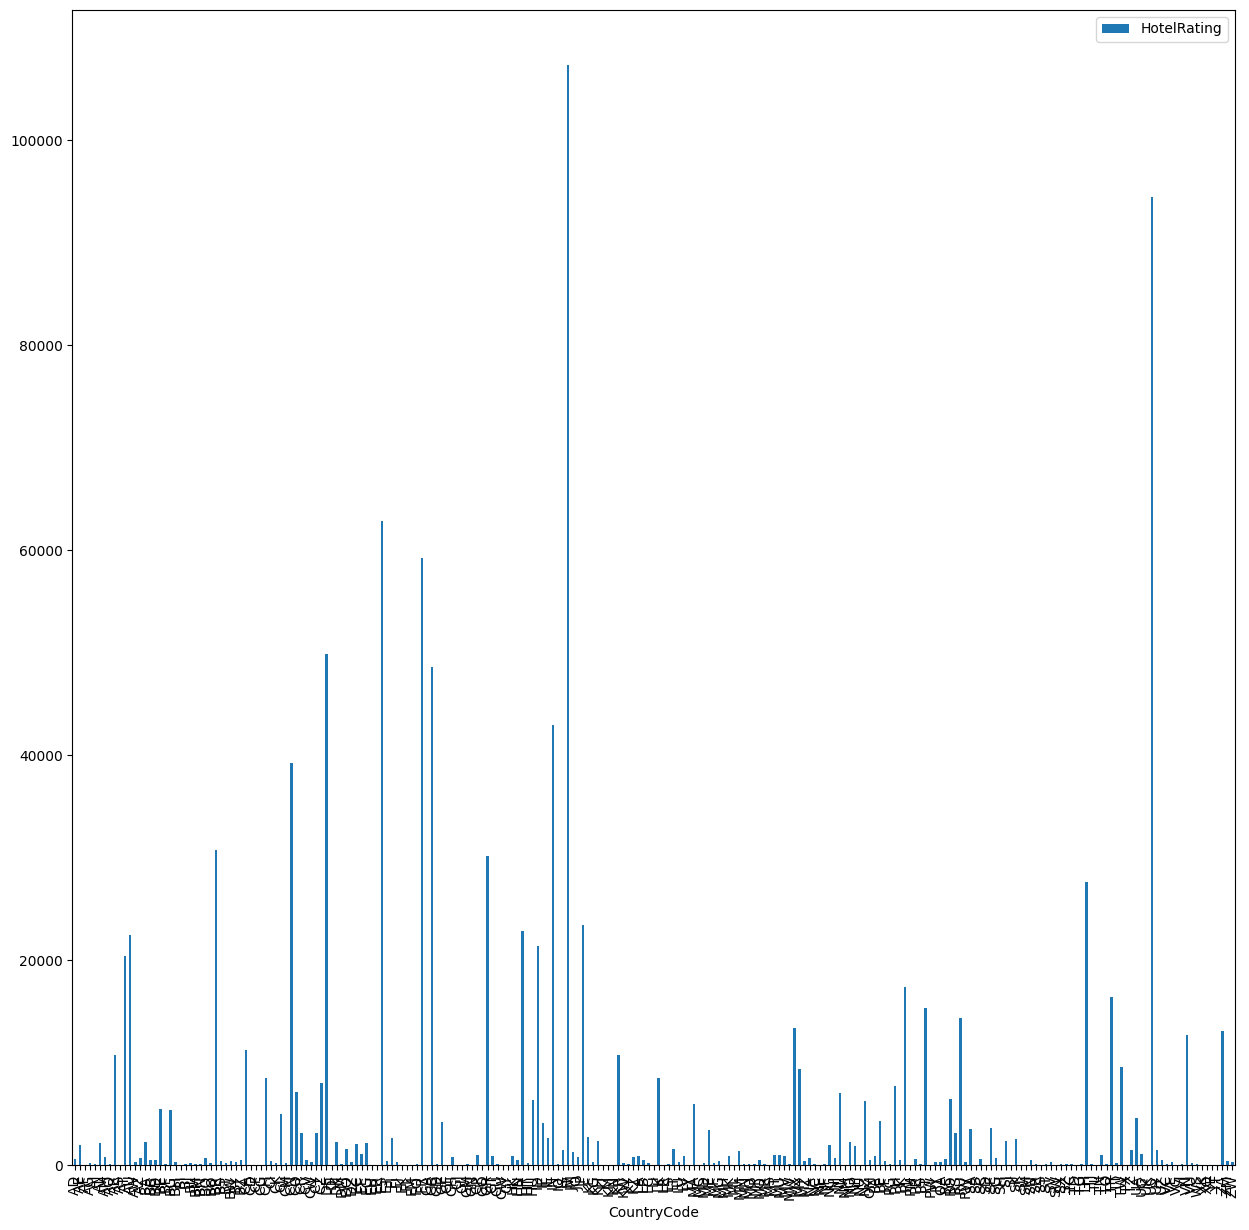

In [61]:
pivot_table.plot(kind='bar',figsize=(15,15))

El histograma de las cuentas de hoteles por código de país muestra que hay países con muchos hoteles. Para tener una mejor idea de la distribución, la lista de hoteles se reducirá a aquellos países con más de 40 mil hoteles.

In [66]:
pivot_table_lots = pivot_table.loc[pivot_table['HotelRating']>40000]

In [67]:
pivot_table_lots.head(40)

,HotelRating
CountryCode,
DE,49890
ES,62860
FR,59238
GB,48593
IN,42907
IT,107367
US,94466


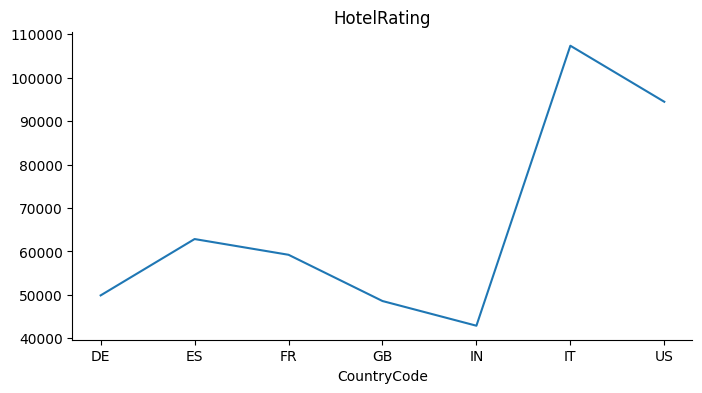

In [68]:
from matplotlib import pyplot as plt
pivot_table_lots['HotelRating'].plot(kind='line', figsize=(8, 4), title='HotelRating')
plt.gca().spines[['top', 'right']].set_visible(False)

Desde un punto de vista comercial, los resultados de los países con mayor registro de hoteles no es sorprendente. De hecho, es fácilmente justificable por su alto turismo. Sin embargo, habrá que tener en cuenta este dato a la hora de hacer el modelo.

## **Análisis Multidimensional**

Dado que se ha observado una tendencia de tener una gran concentración de registros en solamente 7 países. Es necesario evaluar la manera en la que esto afecta nuestros datos en otras dimensiones.

En este sentido, se realizará un análisis de correlación entre nuestras variables cuantitativas.

No obstante, sabemos que el número CountryCode es una variable importante. A su vez, esta variable es categórica con una cardinalidad de 249. En este sentido, se puede convertir los Códigos en números para que puedan ser evaluados.


In [72]:
country_codes = {
    'AD': 1,
    'AE': 2,
    'AF': 3,
    'AG': 4,
    'AI': 5,
    'AL': 6,
    'AM': 7,
    'AO': 8,
    'AQ': 9,
    'AR': 10,
    'AS': 11,
    'AT': 12,
    'AU': 13,
    'AW': 14,
    'AX': 15,
    'AZ': 16,
    'BA': 17,
    'BB': 18,
    'BD': 19,
    'BE': 20,
    'BF': 21,
    'BG': 22,
    'BH': 23,
    'BI': 24,
    'BJ': 25,
    'BL': 26,
    'BM': 27,
    'BN': 28,
    'BO': 29,
    'BQ': 30,
    'BR': 31,
    'BS': 32,
    'BT': 33,
    'BV': 34,
    'BW': 35,
    'BY': 36,
    'BZ': 37,
    'CA': 38,
    'CC': 39,
    'CD': 40,
    'CF': 41,
    'CG': 42,
    'CH': 43,
    'CI': 44,
    'CK': 45,
    'CL': 46,
    'CM': 47,
    'CN': 48,
    'CO': 49,
    'CR': 50,
    'CU': 51,
    'CV': 52,
    'CW': 53,
    'CX': 54,
    'CY': 55,
    'CZ': 56,
    'DE': 57,
    'DJ': 58,
    'DK': 59,
    'DM': 60,
    'DO': 61,
    'DZ': 62,
    'EC': 63,
    'EE': 64,
    'EG': 65,
    'EH': 66,
    'ER': 67,
    'ES': 68,
    'ET': 69,
    'FI': 70,
    'FJ': 71,
    'FK': 72,
    'FM': 73,
    'FO': 74,
    'FR': 75,
    'GA': 76,
    'GB': 77,
    'GD': 78,
    'GE': 79,
    'GF': 80,
    'GG': 81,
    'GH': 82,
    'GI': 83,
    'GL': 84,
    'GM': 85,
    'GN': 86,
    'GP': 87,
    'GQ': 88,
    'GR': 89,
    'GS': 90,
    'GT': 91,
    'GU': 92,
    'GW': 93,
    'GY': 94,
    'HK': 95,
    'HM': 96,
    'HN': 97,
    'HR': 98,
    'HT': 99,
    'HU': 100,
    'ID': 101,
    'IE': 102,
    'IL': 103,
    'IM': 104,
    'IN': 105,
    'IO': 106,
    'IQ': 107,
    'IR': 108,
    'IS': 109,
    'IT': 110,
    'JE': 111,
    'JM': 112,
    'JO': 113,
    'JP': 114,
    'KE': 115,
    'KG': 116,
    'KH': 117,
    'KI': 118,
    'KM': 119,
    'KN': 120,
    'KP': 121,
    'KR': 122,
    'KW': 123,
    'KY': 124,
    'KZ': 125,
    'LA': 126,
    'LB': 127,
    'LC': 128,
    'LI': 129,
    'LK': 130,
    'LR': 131,
    'LS': 132,
    'LT': 133,
    'LU': 134,
    'LV': 135,
    'LY': 136,
    'MA': 137,
    'MC': 138,
    'MD': 139,
    'ME': 140,
    'MF': 141,
    'MG': 142,
    'MH': 143,
    'MK': 144,
    'ML': 145,
    'MM': 146,
    'MN': 147,
    'MO': 148,
    'MP': 149,
    'MQ': 150,
    'MR': 151,
    'MS': 152,
    'MT': 153,
    'MU': 154,
    'MV': 155,
    'MW': 156,
    'MX': 157,
    'MY': 158,
    'MZ': 159,
    'NA': 160,
    'NC': 161,
    'NE': 162,
    'NF': 163,
    'NG': 164,
    'NI': 165,
    'NL': 166,
    'NO': 167,
    'NP': 168,
    'NR': 169,
    'NU': 170,
    'NZ': 171,
    'OM': 172,
    'PA': 173,
    'PE': 174,
    'PF': 175,
    'PG': 176,
    'PH': 177,
    'PK': 178,
    'PL': 179,
    'PM': 180,
    'PN': 181,
    'PR': 182,
    'PS': 183,
    'PT': 184,
    'PW': 185,
    'PY': 186,
    'QA': 187,
    'RE': 188,
    'RO': 189,
    'RS': 190,
    'RU': 191,
    'RW': 192,
    'SA': 193,
    'SB': 194,
    'SC': 195,
    'SD': 196,
    'SE': 197,
    'SG': 198,
    'SH': 199,
    'SI': 200,
    'SJ': 201,
    'SK': 202,
    'SL': 203,
    'SM': 204,
    'SN': 205,
    'SO': 206,
    'SR': 207,
    'SS': 208,
    'ST': 209,
    'SV': 210,
    'SX': 211,
    'SY': 212,
    'SZ': 213,
    'TC': 214,
    'TD': 215,
    'TF': 216,
    'TG': 217,
    'TH': 218,
    'TJ': 219,
    'TK': 220,
    'TL': 221,
    'TM': 222,
    'TN': 223,
    'TO': 224,
    'TR': 225,
    'TT': 226,
    'TV': 227,
    'TW': 228,
    'TZ': 229,
    'UA': 230,
    'UG': 231,
    'UM': 232,
    'US': 233,
    'UY': 234,
    'UZ': 235,
    'VA': 236,
    'VC': 237,
    'VE': 238,
    'VG': 239,
    'VI': 240,
    'VN': 241,
    'VU': 242,
    'WF': 243,
    'WS': 244,
    'YE': 245,
    'YT': 246,
    'ZA': 247,
    'ZM': 248,
    'ZW': 249
}


In [74]:
for index, row in dataframe_analysis.iterrows():
    current_code = row["CountryCode"]

    if current_code in country_codes:
        dataframe_analysis.at[index, "CountryCode"] = country_codes[current_code]

In [79]:
dataframe_analysis.head()

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength,Description,CityName
0,1688289,villa alun,101,115.148258,-8.672673,4.0,2325,HeadLine : In Seminyak (Batubelig)Location : W...,Seminyak
1,1863020,house of ahasna,130,79.864820,7.182650,3.0,732,"Located in Katunayaka, House Of Ahasna feature...",Katunayaka
2,5414820,casa vacanze margherita,110,9.680900,40.360940,0.0,898,Casa Vacanze Margherita is a detached holiday ...,Orosei
3,5758326,casa bethel,91,-90.379270,15.469350,0.0,480,"Located in Cobán, in a building dating from 20...",Coban
4,1116957,pension abc,57,13.365430,52.499470,3.0,1662,This quietly located guest house in Berlin off...,Berlin


Parece ser que los valores fueron cambiados de manera correcta. Para corroborar de nuevo se imprimira la pivot table. Esto nos dejará verificar que el conteo siga siendo el mismo que cuando se tenía el Código de dos letras.

In [78]:
pivot_table = pd.pivot_table(data=dataframe_analysis,index=['CountryCode'],values=['HotelRating'],aggfunc='count')
pivot_table_lots = pivot_table.loc[pivot_table['HotelRating']>40000]
pivot_table_lots.head(40)

,HotelRating
CountryCode,
57,49890
68,62860
75,59238
77,48593
105,42907
110,107367
233,94466


Todo parece estar en orden.

In [80]:
dataframe_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066257 entries, 0 to 1093094
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HotelCode    1066257 non-null  object 
 1   HotelName    1066257 non-null  object 
 2   CountryCode  1066257 non-null  object 
 3   Longitude    1066257 non-null  float64
 4   Latitude     1066257 non-null  float64
 5   HotelRating  1066257 non-null  float64
 6   DescLength   1066257 non-null  int64  
 7   Description  1066257 non-null  object 
 8   CityName     1066257 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 81.3+ MB


Sin embargo, parece ser que pandas no reconoce el código de números como un float o integer, por lo que se tendrá que hacer el cambio.

In [82]:
dataframe_analysis['CountryCode'] = dataframe_analysis['CountryCode'].apply(to_float_number)
dataframe_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066257 entries, 0 to 1093094
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HotelCode    1066257 non-null  object 
 1   HotelName    1066257 non-null  object 
 2   CountryCode  1066203 non-null  float64
 3   Longitude    1066257 non-null  float64
 4   Latitude     1066257 non-null  float64
 5   HotelRating  1066257 non-null  float64
 6   DescLength   1066257 non-null  int64  
 7   Description  1066257 non-null  object 
 8   CityName     1066257 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 81.3+ MB


Ahora sí es posible hacer la correlación entre las variables cuantitativas.

In [83]:
dataframe_analysis_corr= dataframe_analysis.drop(['HotelCode','HotelName','Longitude','Latitude', 'CityName', 'Description'], axis=1)

In [84]:

correlation_matrix = dataframe_analysis_corr.corr()

print(correlation_matrix)


             CountryCode  HotelRating  DescLength
CountryCode     1.000000    -0.000611    0.091957
HotelRating    -0.000611     1.000000   -0.001226
DescLength      0.091957    -0.001226    1.000000


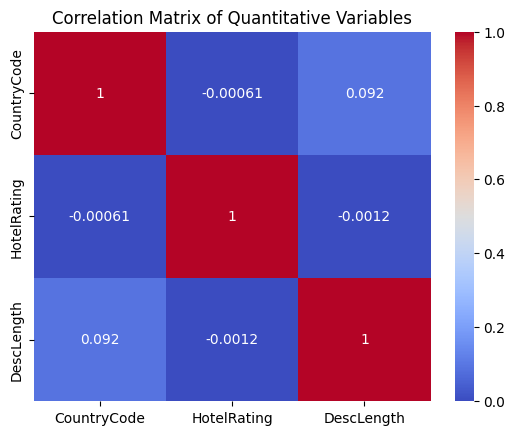

In [85]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation Matrix of Quantitative Variables')
plt.show()


Según nuestro analisis cuantitativo y gráfico, no existe una correlación entre los datos que se utilizarán para la creación del programa.

## **Conclusiones**



El análisis realizado ha proporcionado insights valiosos respecto a la naturaleza y distribución de los datos estudiados. A través del empleo de diversas técnicas estadísticas y herramientas analíticas avanzadas, se ha logrado una comprensión profunda de los patrones subyacentes y las correlaciones entre diferentes variables.

Inicialmente, se realizó un proceso de limpieza y preparación de datos, que incluyó la eliminación de valores atípicos y la imputación de datos faltantes, lo cual fue crucial para asegurar la integridad del análisis. Posteriormente, mediante el uso de tablas pivote, se identificaron tendencias clave en el comportamiento de las variables, destacando diferencias y similitudes significativas en los subconjuntos de datos.

En este sentid,o es importante destacar que del análisis ayuda concluir que los datos presentan ciertas características. Por ejemplo:

1. De las 14 dimensiones originales, 5 son descartables ya que no contienen información relevante para este proyecto.
2. Se eliminaron cerca de 30,000 registros que se encontraban incompletos.
3. Los datos tienen un sesgo. Existe una mayor cantidad de registros de hoteles en loa países más turísticos de Europa (Italia, España, Gran Bretaña, Francia, etc.) y Estados Unidos.
4. Este sesgo, según nuestro análisis multidimensional, no interfiere en las correlaciones de nuestras variables. Esto quiere decir que nuestras vairables están muy poco correlacionadas al menos de manera linear. Posteriormente será importante evaluar si se puede encontrar una relación con otro tipo de tendencia.

Es importante mencionar, que de momento estos sesgos no parecen ser relevante para el Sponsor. Volindo es una empresa mexicana cuyo mercado esta enfocado principalmente en clientes que suelen viajar a USA, Europa y dentro de México. En este sentido, se puede intuir que el sesgo no afectaría al mercado enfocado.

## **Referencias**

* ISO. (s.f.) ISO 3166 — Country Codes. Internation Standards Organization. Recuperado 03 de mayo, 2024 de https://www.iso.org/iso-3166-country-codes.html

* Pandas. (s.f.). pandas.pivot_table — pandas 2.2.2 documentation.. Pandas.pydata.org. Recuperado 03 de mayo, 2024 de https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#
